In [1]:

import pandas as pd

In [2]:
df=pd.read_csv('Y_Train_Data_Target.csv')

In [3]:
df1=pd.read_csv('X_Train_Data_Input.csv')

In [4]:
cdf=pd.read_csv('Y_Test_Data_Target.csv')

In [5]:
cdf1=pd.read_csv('X_Test_Data_Input.csv')

In [6]:
df.shape

(785133, 2)

In [7]:
cdf1.shape

(261712, 23)

In [8]:
training_df = pd.merge(df1, df, on='ID', how='left')

In [9]:
training_df.shape

(785133, 24)

In [10]:
testing_df = pd.merge(cdf1, cdf, on='ID', how='left')

In [11]:
testing_df.shape

(261712, 24)

In [12]:
training_df.head()

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,...,0,0.001351,0.00339,0.0,0,0.0,0,0,0,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,...,0,0.001351,0.00339,0.0,0,0.0,0,0,0,0
2,22ba388e7dd14c13342c49e75fc29dda,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,1,0.001351,0.00339,0.0,0,0.0,0,0,0,0
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,NaN,NaN,NaN,-0.407939,-0.015607,-0.774979,...,0,NaN,0.00339,0.0,0,1.0,0,0,0,1
4,f6317cf7ecf126859804eddff279aead,0.0,718,950.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,...,0,NaN,0.00339,0.0,0,0.0,0,0,0,0


In [13]:
testing_df.head()

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
0,07cf2025382f6325b316e128b1b90999,1.0,1986,53.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.554860,...,1,0.001351,0.00339,0.0,0,0.0,0,0,0,0
1,eb972eb3a1f8d0d1a13f45e7c07d37d4,2.0,1579,12.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.142149,...,0,0.001351,0.00339,0.0,0,0.0,0,0,0,0
2,ee35e164b3ddc25a9f40243b81ad290d,0.0,898,3817.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,...,0,NaN,0.00339,0.0,0,0.0,0,0,0,0
3,28229ccd7bad7dd83324a4175a7e0531,0.0,79,3449.0,-0.675216,-0.577162,-0.007469,0.004020,-0.015607,0.635264,...,1,0.001351,0.00339,0.0,0,0.0,0,0,0,0
4,2f94873da2c332d28f111742818e0fbb,1.0,646,6510.0,-2.028572,-1.855728,NaN,-0.407939,-0.015434,-0.774979,...,1,NaN,0.00339,0.0,0,0.0,0,0,0,0


In [14]:

testing_df.isnull().sum()

ID               0
Column0          2
Column1          0
Column2          0
Column3      42234
Column4      42710
Column5      55659
Column6       1234
Column7          0
Column8       1234
Column9     243853
Column10         0
Column11         0
Column12         0
Column13         0
Column14    121679
Column15      5485
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
target           0
dtype: int64

In [15]:
training_df = training_df.drop('Column9', axis=1)
testing_df = testing_df.drop('Column9', axis=1)

In [16]:
columns_to_interpolate = ['Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column14', 'Column15']

In [17]:
training_df.dropna(subset=['Column0'], inplace=True)
testing_df.dropna(subset=['Column0'], inplace=True)

In [18]:
training_df[columns_to_interpolate] = training_df[columns_to_interpolate].interpolate(method='linear', axis=0)
testing_df[columns_to_interpolate] = testing_df[columns_to_interpolate].interpolate(method='linear', axis=0)

In [19]:

training_df.shape

(785124, 23)

In [20]:
from scipy import stats
import numpy as np


In [21]:
numeric_columns = training_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('target')  # Remove target from numeric columns
z_scores = np.abs(stats.zscore(training_df[numeric_columns]))
threshold = 3

# Identify rows where Z-score is less than the threshold across all numeric columns
outliers = (z_scores < threshold).all(axis=1)

# Remove outliers from the training dataframe
training_df_cleaned = training_df[outliers]

In [22]:
print(f"Original data size: {training_df.shape}")
print(f"Data size after removing outliers: {training_df_cleaned.shape}")

Original data size: (785124, 23)
Data size after removing outliers: (689548, 23)


In [23]:
training_df_cleaned.head()

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,...,0,0.001351,0.00339,0.0,0,0.0,0,0,0,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,...,0,0.001351,0.00339,0.0,0,0.0,0,0,0,0
2,22ba388e7dd14c13342c49e75fc29dda,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,1,0.001351,0.00339,0.0,0,0.0,0,0,0,0
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,-1.803013,-1.642634,-0.007469,-0.407939,-0.015607,-0.774979,...,0,0.001351,0.00339,0.0,0,1.0,0,0,0,1
4,f6317cf7ecf126859804eddff279aead,0.0,718,950.0,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,...,0,0.001351,0.00339,0.0,0,0.0,0,0,0,0


In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separating features and target
X =training_df_cleaned.drop(columns=['ID', 'target'])
y =training_df_cleaned['target']

# Apply SMOTE to balance the target variable
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After SMOTE oversampling:")
print(y_resampled.value_counts())


After SMOTE oversampling:
0    636660
1    636660
Name: target, dtype: int64


In [25]:
y.value_counts()

0    636660
1     52888
Name: target, dtype: int64

In [26]:
y_resampled.value_counts()

0    636660
1    636660
Name: target, dtype: int64

In [27]:
# Prepare the testing dataset by dropping 'ID' column
X_test = testing_df.drop(columns=['ID'])


## 1. Decision Tree 

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [29]:
# Initialize and train the Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_resampled, y_resampled)

DecisionTreeClassifier(random_state=42)

In [30]:
# Prepare testing data by dropping 'ID' and 'target' columns
X_test = testing_df.drop(columns=['ID', 'target'])
y_test_pred = decision_tree.predict(X_test)

In [31]:
y_test_true = testing_df['target']

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test_true, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test_true, y_test_pred))



Confusion Matrix:
[[232193   4839]
 [  3647  21031]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    237032
           1       0.81      0.85      0.83     24678

    accuracy                           0.97    261710
   macro avg       0.90      0.92      0.91    261710
weighted avg       0.97      0.97      0.97    261710



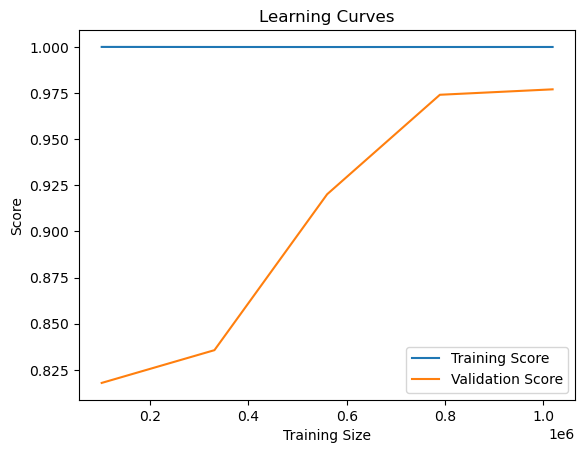

In [32]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(decision_tree, X_resampled, y_resampled, cv=5)

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, val_scores_mean, label='Validation Score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()


AUC-ROC Score: 0.9160939225996572


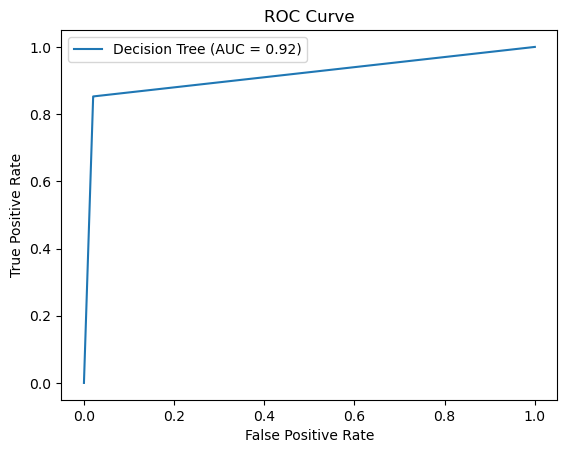

In [33]:
# If you have probability scores, you can calculate the AUC-ROC
roc_auc = roc_auc_score(y_test_true, decision_tree.predict_proba(X_test)[:, 1])
print("\nAUC-ROC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_true, decision_tree.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

Training dataset with a validation set

In [34]:
from sklearn.model_selection import train_test_split

# Assuming X_resampled and y_resampled are the SMOTE-balanced features and target
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Now you can train your model on X_train and y_train, and validate on X_val and y_val
decision_tree.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = decision_tree.predict(X_val)

# Evaluate on the validation set
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# AUC-ROC Score
y_val_proba = decision_tree.predict_proba(X_val)[:, 1]
print("Validation AUC-ROC Score:", roc_auc_score(y_val, y_val_proba))


Validation Confusion Matrix:
[[125290   1977]
 [  1850 125547]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    127267
           1       0.98      0.99      0.98    127397

    accuracy                           0.98    254664
   macro avg       0.98      0.98      0.98    254664
weighted avg       0.98      0.98      0.98    254664

Validation AUC-ROC Score: 0.9849976804102695


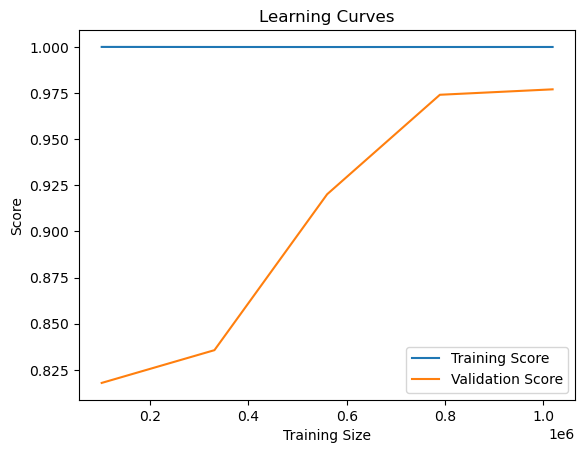

In [35]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(decision_tree, X_resampled, y_resampled, cv=5)

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, val_scores_mean, label='Validation Score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

## 2. Random Forest

In [37]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [38]:
y_val_pred = rf_model.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))



Confusion Matrix:
[[124837   2430]
 [   293 127104]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    127267
           1       0.98      1.00      0.99    127397

    accuracy                           0.99    254664
   macro avg       0.99      0.99      0.99    254664
weighted avg       0.99      0.99      0.99    254664



In [39]:
# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_val, rf_model.predict_proba(X_val)[:, 1])
print(f"\nValidation AUC-ROC Score: {roc_auc}")

# Feature importance (optional, to check which features are important)
importances = rf_model.feature_importances_
feature_importance = sorted(zip(importances, X_train.columns), reverse=True)
print("\nFeature Importances:")
for importance, name in feature_importance:
    print(f"{name}: {importance}")



Validation AUC-ROC Score: 0.9987652520742224

Feature Importances:
Column18: 0.5859897398414268
Column1: 0.1578660966411826
Column4: 0.07281627538963248
Column8: 0.04512595751622556
Column3: 0.042468428818890215
Column12: 0.020152336934131466
Column11: 0.01675267657978645
Column13: 0.015900278174881835
Column2: 0.009750501627977432
Column6: 0.008291117896724421
Column0: 0.006661198958444825
Column10: 0.006409998370393499
Column7: 0.004119088744839924
Column17: 0.003915049592034026
Column5: 0.0020989191770709307
Column15: 0.0010364265347708982
Column14: 0.0006459092015866443
Column21: 0.0
Column20: 0.0
Column19: 0.0
Column16: 0.0


In [41]:
X_test = testing_df.drop(columns=['ID', 'target'])  # Drop 'ID' and 'target' columns from test data
y_test = testing_df['target']  # This is the actual target labels for testing

# Predict on the test set using the trained Random Forest model
y_test_pred = rf_model.predict(X_test)
y_test_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability scores for ROC-AUC

# Evaluate the model on the test set

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f"\nTesting AUC-ROC Score: {roc_auc}")

Confusion Matrix:
[[231111   5921]
 [   678  24000]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    237032
           1       0.80      0.97      0.88     24678

    accuracy                           0.97    261710
   macro avg       0.90      0.97      0.93    261710
weighted avg       0.98      0.97      0.98    261710


Testing AUC-ROC Score: 0.9927353118965759


In [44]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [43]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 975.2 kB/s eta 0:02:09
   ---------------------------------------- 0.4/124.9 MB 3.4 MB/s eta 0:00:37
   ---------------------------------------- 0.9/124.9 MB 5.6 MB/s eta 0:00:23
   ---------------------------------------- 1.5/124.9 MB 7.4 MB/s eta 0:00:17
    --------------------------------------- 2.4/124.9 MB 9.5 MB/s eta 0:00:13
   - -------------------------------------- 3.4/124.9 MB 11.3 MB/s eta 0:00:11
   - -------------------------------------- 4.6/124.9 MB 13.3 MB/s eta 0:00:10
   - -------------------------------------- 5.8/124.9 MB 14.7 MB/s eta 0:00:09
   -- ------------------------------------- 6.8/124.9 MB 15.6 MB/s eta 0:00:08
   -- ------------------------------------- 7.6/124.9 MB 15.7 MB/s eta 0:00:08
   -- ------------------------------------- 8.2/124.9 MB 15.4 MB/s eta 

## 3. XG Boost

In [45]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model on the resampled training data
xgb_model.fit(X_train, y_train)

C:\Users\niyaj\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:44:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [46]:
y_val_pred = xgb_model.predict(X_val)

# Evaluate the model on the validation set
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)
val_auc_roc = roc_auc_score(y_val, xgb_model.predict_proba(X_val)[:, 1])

print("Validation Confusion Matrix:")
print(val_conf_matrix)

print("\nValidation Classification Report:")
print(val_class_report)

print(f"Validation AUC-ROC Score: {val_auc_roc}")



Validation Confusion Matrix:
[[125070   2197]
 [   522 126875]]

Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    127267
           1       0.98      1.00      0.99    127397

    accuracy                           0.99    254664
   macro avg       0.99      0.99      0.99    254664
weighted avg       0.99      0.99      0.99    254664

Validation AUC-ROC Score: 0.9990984781508407


In [47]:
# Now, predict on the test set
y_test_pred = xgb_model.predict(X_test)

# Evaluate the model on the test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)
test_auc_roc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print("\nTest Confusion Matrix:")
print(test_conf_matrix)

print("\nTest Classification Report:")
print(test_class_report)

print(f"Test AUC-ROC Score: {test_auc_roc}")


Test Confusion Matrix:
[[231875   5157]
 [  1131  23547]]

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    237032
           1       0.82      0.95      0.88     24678

    accuracy                           0.98    261710
   macro avg       0.91      0.97      0.93    261710
weighted avg       0.98      0.98      0.98    261710

Test AUC-ROC Score: 0.9935417583620644


In [48]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier


In [49]:
# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],           # Number of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],             # Step size shrinkage
    'max_depth': [3, 5, 7, 10],                          # Maximum tree depth
    'min_child_weight': [1, 3, 5],                       # Minimum sum of instance weight needed in a child
    'subsample': [0.6, 0.8, 1.0],                        # Fraction of samples used per tree
    'colsample_bytree': [0.6, 0.8, 1.0],                 # Fraction of features used per tree
    'gamma': [0, 0.1, 0.3, 0.5],                         # Minimum loss reduction for a split
    'reg_alpha': [0, 0.01, 0.1, 1],                      # L1 regularization
    'reg_lambda': [1, 0.1, 0.01],                        # L2 regularization
}



In [50]:
# Create an instance of XGBClassifier
xgb_modelht = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(estimator=xgb_modelht, 
                                   param_distributions=param_grid, 
                                   n_iter=50,          # Number of parameter settings sampled
                                   scoring='roc_auc',  # Use AUC-ROC as the scoring metric
                                   cv=3,               # 3-fold cross-validation
                                   verbose=1, 
                                   random_state=42, 
                                   n_jobs=-1)

# Fit the model on the resampled training data
random_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {random_search.best_params_}")

# Train the model with the best parameters
best_xgb_model = random_search.best_estimator_



Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\niyaj\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:05:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}


In [51]:
# Predict on the test set
y_test_pred = best_xgb_model.predict(X_test)

# Evaluate the tuned model on the test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)
test_auc_roc = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1])

print("\nTest Confusion Matrix:")
print(test_conf_matrix)

print("\nTest Classification Report:")
print(test_class_report)

print(f"Test AUC-ROC Score: {test_auc_roc}")


Test Confusion Matrix:
[[231880   5152]
 [  1074  23604]]

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    237032
           1       0.82      0.96      0.88     24678

    accuracy                           0.98    261710
   macro avg       0.91      0.97      0.94    261710
weighted avg       0.98      0.98      0.98    261710

Test AUC-ROC Score: 0.9936823453210908
